In [5]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import math, gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

Using matplotlib backend: Qt5Agg


In [146]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=1e6)
        #M_ = gillespy2.Species(name='M_', initial_value=1e6)
        H_ = gillespy2.Species(name='H_', initial_value=0)
        
        self.add_species([S_,H_])
        
        # parameters
        k2 = gillespy2.Parameter(name='k2', expression=1e-10)
        k3 = gillespy2.Parameter(name='k3', expression=0.05)
        Sa = gillespy2.Parameter(name='Sa_', expression=3e8)
        MuA = gillespy2.Parameter(name='MuA', expression=0.05)
        ns = gillespy2.Parameter(name='ns', expression=3.38) # avg = 3.38
        
        self.add_parameter([k2,k3,Sa,ns,MuA])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={S_:float(ns.expression)}, products={H_:1},
                               propensity_function="(k2*S_*(Sa_/(k2*S_ + MuA)))/ns")
        
        r2 = gillespy2.Reaction(name='r4', reactants={H_:1}, products = {},
                                rate=k3)       
        
        
        self.add_reaction([r1,r2])
        t = numpy.linspace(0,4,21)
        self.timespan(t)
        # print(t)

In [147]:
model = DayModel()

In [148]:
%time results = model.run(solver=BasicTauHybridSolver())

Wall time: 3.82 s


90117.51999990307
0.09011751999990307


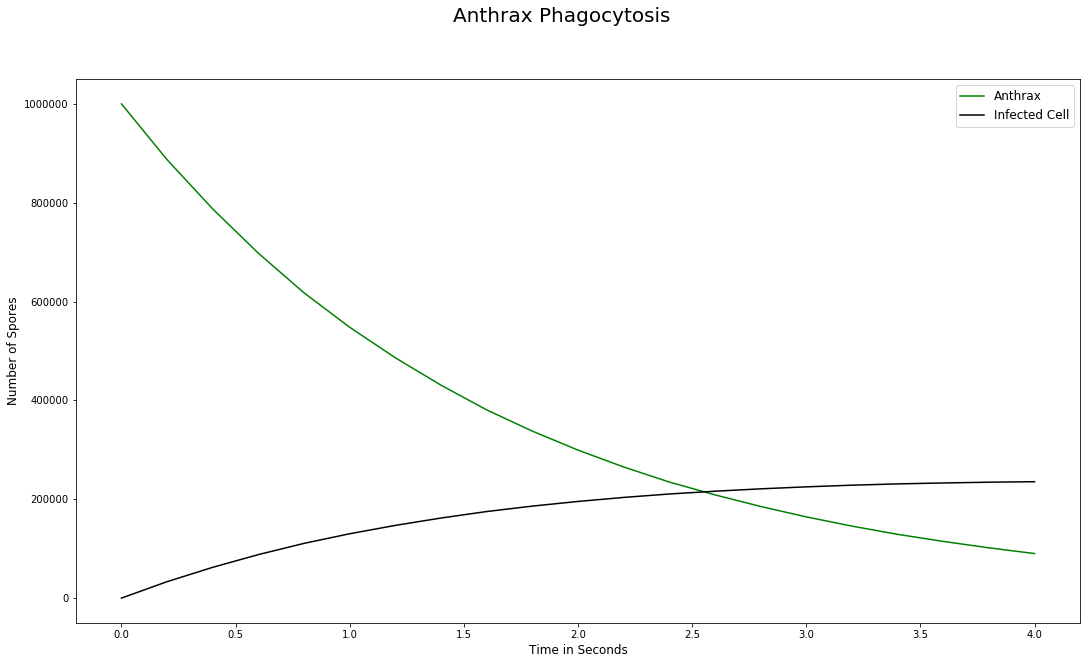

In [149]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Anthrax Phagocytosis", fontsize=20)
plt.plot(results['time'], results['S_'], 'g-', label='Anthrax')
#plt.plot(results['time'], results['M_'], 'b-', label='Macrophage')
plt.plot(results['time'], results['H_'], 'k-', label='Infected Cell')
plt.xlabel("Time in Seconds", fontsize=12)
plt.ylabel("Number of Spores", fontsize=12)
plt.legend(loc='best', fontsize=12)
#print(results['S_'][-1]/(results['S_'][0]/int(model.listOfParameters['ns'].expression)))
#print(results['H_'][-1])
print(results['S_'][-1])
print(results['S_'][-1]/results['S_'][0])


